<a href="https://colab.research.google.com/github/chineidu/NLP-Tutorial/blob/main/notebook/03_tensorflow/02_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression With TensorFlow

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


### Create Data

* This data will be used to train the neural network

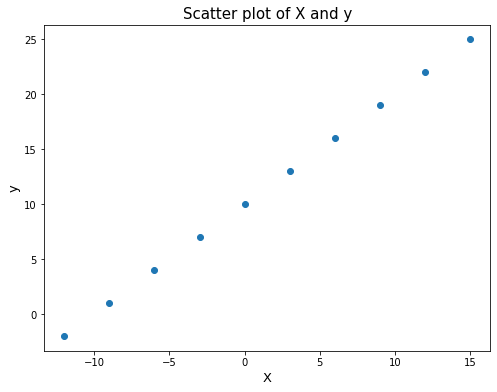

In [2]:
X = np.array([[-12, -9, -6, -3, 0, 3, 6, 9, 12, 15]]) # Row Matrix
y = np.array([-2, 1, 4, 7, 10, 13, 16, 19, 22, 25])


# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter plot of X and y", size=15)
plt.show()

In [3]:
y == X + 10

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [4]:
# Convert the NumPy arrays to Tensors
# Cast and reshape X
X = tf.cast(tf.constant(X), dtype=tf.float16)
X = tf.reshape(X, shape=(-1, 1))
y = tf.cast(tf.constant(y), dtype=tf.float16)

X.shape, y.shape

(TensorShape([10, 1]), TensorShape([10]))

### Steps In Modelling With TensorFlow

1. **Create a model**: define the `input`, `hidden` and `output` layers of the deep learning model.
2. **Compile the model**: define the `loss function` (i.e the function that tells our model how wrong it is), the `optimizer` (it tells our model how to improve the patterns its learning) and the `evaluation metrics` (what we can use to interpret the performance of our model).
3. **Fit the model**: the model `learns` the `patterns` between the input and the output

#### Create a baseline model


### Some Key Terms

* **Loss**: How wrong the model predictions are (you want to minimize this)
* **Optimizer**: It tells the model how it should update it's parameters to imporeve its predictions.
* **Metrics**: Human interpretable values for how well the model is performing.
* **Epocs**: This represents the number of times the model will go thru all the training examples.

In [5]:
# Set seed for reproducibility
SEED = 123
tf.random.set_seed(SEED)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # The model has a single neuron

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # MAE: Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # OR 'sgd'
              metrics = ["mae"] # OR tf.keras.losses.mae
              )

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.4409 - mae: 11.4409
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 11.2824 - mae: 11.2824
Epoch 3/5
1/1 [==============================] - 0s 30ms/step - loss: 11.1904 - mae: 11.1904
Epoch 4/5
1/1 [==============================] - 0s 44ms/step - loss: 11.1579 - mae: 11.1579
Epoch 5/5
1/1 [==============================] - 0s 25ms/step - loss: 11.1254 - mae: 11.1254


In [6]:
X, y

(<tf.Tensor: shape=(10, 1), dtype=float16, numpy=
 array([[-12.],
        [ -9.],
        [ -6.],
        [ -3.],
        [  0.],
        [  3.],
        [  6.],
        [  9.],
        [ 12.],
        [ 15.]], dtype=float16)>,
 <tf.Tensor: shape=(10,), dtype=float16, numpy=array([-2.,  1.,  4.,  7., 10., 13., 16., 19., 22., 25.], dtype=float16)>)

In [13]:
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 202ms/step


array([[4.378926]], dtype=float32)

In [14]:
# Since the mae is ~11 on average, let's add 11 to the predicted value
y_pred + 11

array([[15.378925]], dtype=float32)